In [4]:
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("CO2 Emissions.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.shape

(7385, 12)

In [7]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


check for the duplicate rows and drop them

In [8]:
df.loc[df.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [9]:
df.drop_duplicates(inplace=True)

check for the rows with any null value

In [10]:
df[df.isnull().any(axis=1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [11]:
df.dropna(inplace=True)

In [12]:
df.sample(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6190,MERCEDES-BENZ,AMG SL 63,TWO-SEATER,5.5,8,A7,Z,15.3,10.2,13.0,22,303
4709,FORD,EXPLORER AWD,SUV - STANDARD,2.3,4,AS6,X,13.1,9.2,11.4,25,267
1624,INFINITI,Q60,SUBCOMPACT,3.7,6,AS7,Z,12.4,8.7,10.7,26,246
5027,LAMBORGHINI,AVENTADOR S COUPE,TWO-SEATER,6.5,12,AM7,Z,23.8,14.1,19.4,15,454
5826,FORD,Transit Connect Wagon LWB,SPECIAL PURPOSE VEHICLE,2.5,4,AS6,X,12.1,9.0,10.7,26,251
6548,AUDI,S5,SUBCOMPACT,3.0,6,AS8,Z,11.8,8.9,10.5,27,245
3326,ALFA ROMEO,GIULIA QUADRIFOGLIO,MID-SIZE,2.9,6,A8,Z,13.8,9.6,11.9,24,280
4110,MINI,COOPER CONVERTIBLE,MINICOMPACT,1.5,3,M6,Z,8.5,6.3,7.5,38,175
4034,MAZDA,MAZDA5,MINIVAN,2.5,4,M6,X,11.1,8.3,9.8,29,230
479,GMC,YUKON XL 4WD,SUV - STANDARD,5.3,8,A6,X,16.0,11.1,13.8,20,317


In [13]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

rename the columns

In [14]:
df.rename(columns={"Vehicle Class":'vehicle_class','Engine Size(L)':'Engine_size(L)',"Fuel Type":"Fuel_type",'Fuel Consumption City (L/100 km)':'Fuel_consumption_city(L/100)',
       'Fuel Consumption Hwy (L/100 km)':'Fuel_consumption_hwy(L/100)', 'Fuel Consumption Comb (L/100 km)':'Fuel_consumption_comb(L/100)',
       'Fuel Consumption Comb (mpg)':'Fuel_consumption_comb(mpg)', 'CO2 Emissions(g/km)':'CO2_emission(g/km)'},inplace=True)

exploring the various makers

In [15]:
df.Make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [16]:
numerical_cols=df.select_dtypes(include=['int','float'])

In [17]:
agg_fun={
    'CO2_emission(g/km)':['mean','median','max','min'],
    'Engine_size(L)':['max','mean']
}
df.groupby('Make')[['CO2_emission(g/km)','Engine_size(L)']].agg(agg_fun).sort_values(by=[('CO2_emission(g/km)','mean'),('Engine_size(L)',"max")],ascending=False).head()

CO2_emission(g/km)                  Engine_size(L)          
                          mean median  max  min            max      mean
Make                                                                    
BUGATTI             522.000000  522.0  522  522            8.0  8.000000
LAMBORGHINI         402.270270  384.0  493  331            6.5  5.764865
SRT                 389.000000  389.0  389  389            8.4  8.400000
ROLLS-ROYCE         388.750000  393.0  404  359            6.7  6.647917
BENTLEY             367.914286  373.0  465  291            6.8  5.531429

In [18]:
df.drop(columns="Fuel_consumption_comb(mpg)",inplace=True)

carbon emission of various vehicle classes

In [19]:
data=df.groupby('vehicle_class')['CO2_emission(g/km)'].agg(carbon_emission=('mean')).sort_values(by=['carbon_emission'],ascending=False)
data.head()
# so generally the van-passenger and van cargo class vehicle has the maximum carbon emission

,carbon_emission
vehicle_class,
VAN - PASSENGER,397.212121
VAN - CARGO,361.500000
SUV - STANDARD,306.730832
PICKUP TRUCK - STANDARD,301.610526
TWO-SEATER,282.086614


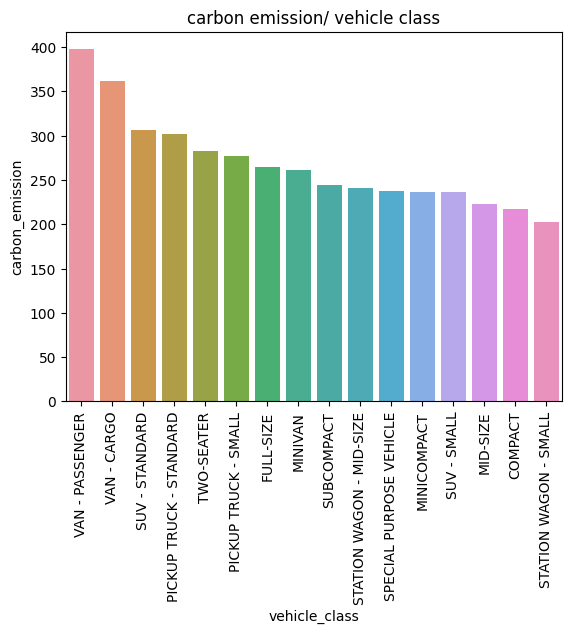

In [20]:
sns.barplot(data=data,x=data.index,y='carbon_emission')
plt.title('carbon emission/ vehicle class')
plt.xticks(rotation=90);

variation of carbon emission with the engine size 

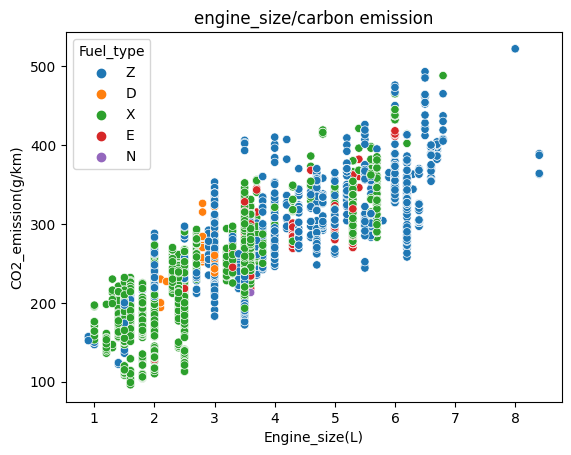

In [21]:
sns.scatterplot(data=df,x='Engine_size(L)',y='CO2_emission(g/km)',hue="Fuel_type")
plt.title('engine_size/carbon emission');
# so vehicle with larger engine size tends to have larger carbon emission

variation of carbon emission

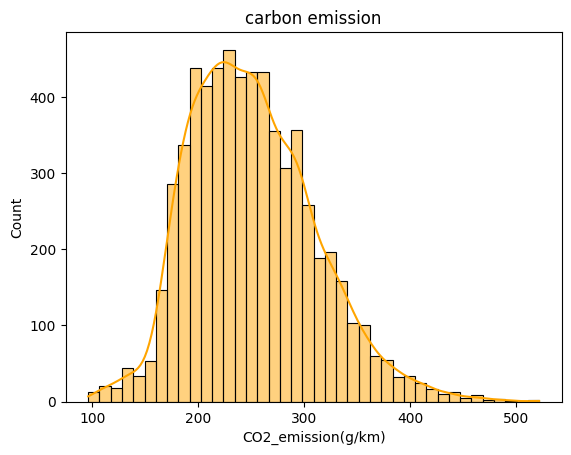

In [22]:
sns.histplot(df['CO2_emission(g/km)'],fill=True,bins=40,color='orange',kde=True)
plt.title('carbon emission');
# so the maximum  carbon emission is between 200 and 300

In [23]:
data=df.groupby('Transmission')['CO2_emission(g/km)'].agg(carbon_emission=('mean')).sort_values(by=['carbon_emission'],ascending=False)
data

,carbon_emission
Transmission,
A7,314.272727
A10,313.964286
A5,299.371795
A4,296.590164
A8,285.415344
AS10,283.125828
A6,278.798246
AS7,278.431095
AS5,275.115385


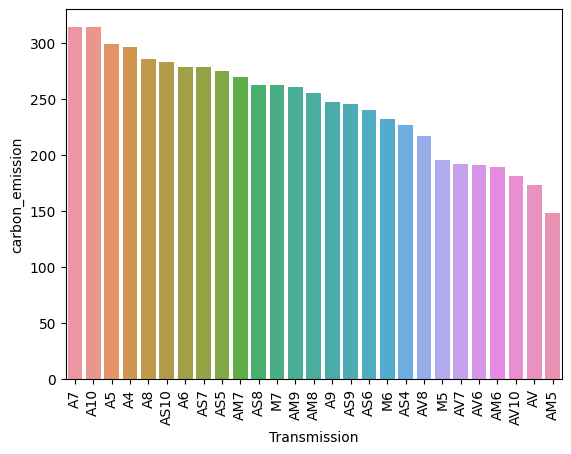

In [24]:
sns.barplot(data=data,x=data.index,y='carbon_emission')
plt.xticks(rotation=90);

which fuel type has largest emission

<Axes: xlabel='Fuel_type', ylabel='CO2_emission(g/km)'>

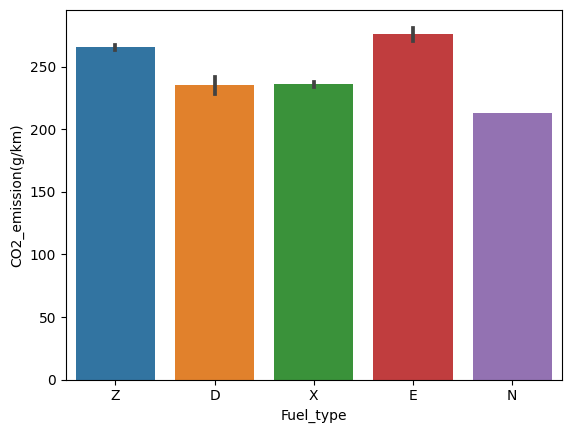

In [25]:
df.Fuel_type.unique()
sns.barplot(data=df,x='Fuel_type',y='CO2_emission(g/km)')

In [26]:
df.groupby(['Make','Model'])[['CO2_emission(g/km)','Fuel_consumption_city(L/100)']].agg('mean').sort_values(by='CO2_emission(g/km)',ascending=False)
# so if greater is the fuel consumption the greater is the emission

CO2_emission(g/km)  \
Make        Model                                    
BUGATTI     CHIRON                           522.0   
            Chiron                           522.0   
LAMBORGHINI Aventador Roadster               493.0   
FORD        E350 WAGON                       488.0   
LAMBORGHINI Aventador Coupe                  486.0   
...                                            ...   
TOYOTA      Corolla Hybrid                   106.0   
            Prius                            105.5   
HYUNDAI     IONIQ                            102.0   
            IONIQ BLUE                        96.0   
            IONIQ Blue                        96.0   

                                Fuel_consumption_city(L/100)  
Make        Model                                             
BUGATTI     CHIRON                                    26.800  
            Chiron                                    26.800  
LAMBORGHINI Aventador Roadster                        26.600  
FORD        E350 WAGON                                23.900  
LAMBORGHINI Aventador Coupe                           26.250  
...                                                      ...  
TOYOTA      Corolla Hybrid                             4.400  
            Prius                                      4.400  
HYUNDAI     IONIQ                                      4.275  
            IONIQ BLUE                                 4.200  
            IONIQ Blue                                 4.200  

[2053 rows x 2 columns]

relation between the number of cylinders and carbon emission

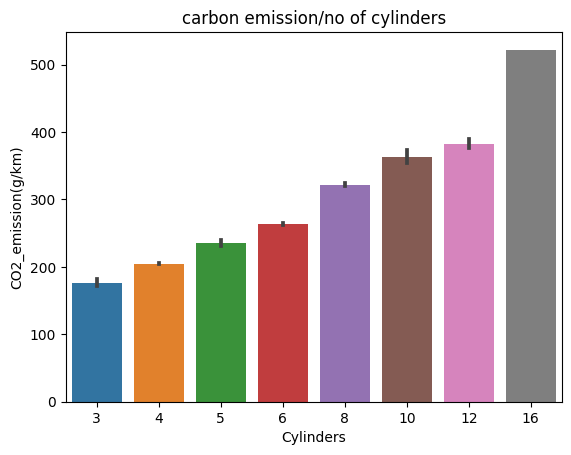

In [27]:
sns.barplot(data=df,x='Cylinders',y='CO2_emission(g/km)')
plt.title("carbon emission/no of cylinders");
# basically as the number of cylinders increases the carbon emission increases

carbon emission and fuel consumption in cities and fuel types

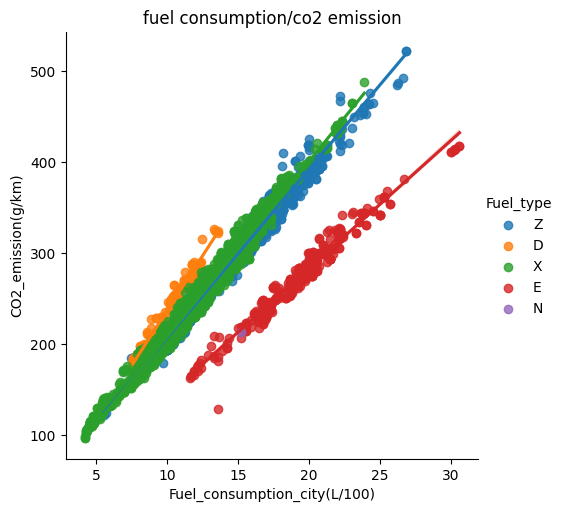

In [28]:
sns.lmplot(data=df,x='Fuel_consumption_city(L/100)',y='CO2_emission(g/km)',hue='Fuel_type')
plt.title("fuel consumption/co2 emission");
# so as the fuel consumption increases the emission also increases

number of cylinders and engine size

<Axes: xlabel='Cylinders', ylabel='Engine_size(L)'>

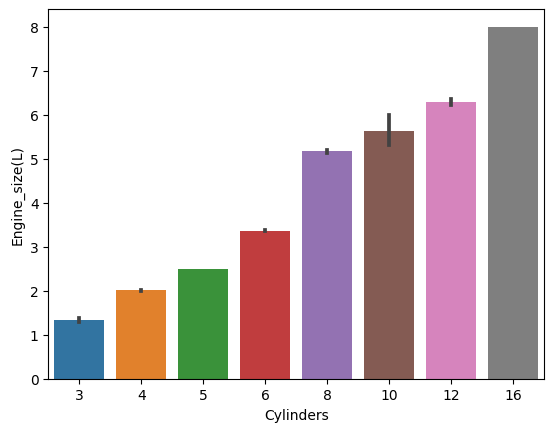

In [29]:
sns.barplot(data=df,x='Cylinders',y='Engine_size(L)')
# so vehicle with greater engine size has more number of cylinders and more is the carbon emission

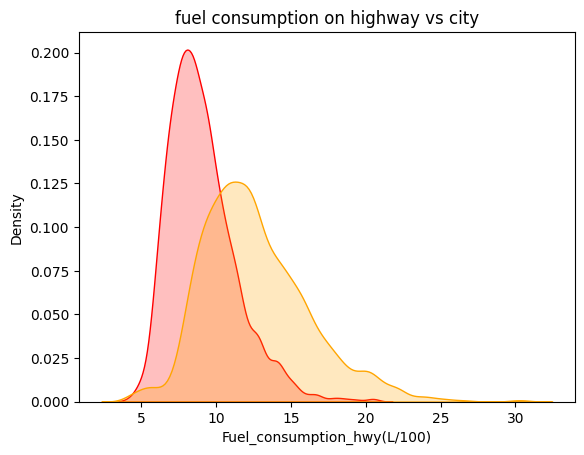

In [30]:
sns.kdeplot(df['Fuel_consumption_hwy(L/100)'],color='red',fill=True)
sns.kdeplot(df['Fuel_consumption_city(L/100)'],color='orange',fill=True)
plt.title('fuel consumption on highway vs city');
# so basically the consumption of the fuel in the city is maximum and mean fuel consumption in city is between 10-15l per 100km and
#  on highways the mean consumption is between 5-10l per 100km

In [31]:
data=df.groupby('vehicle_class')[['Engine_size(L)','CO2_emission(g/km)','Fuel_consumption_city(L/100)','Cylinders','Fuel_consumption_hwy(L/100)']].agg('mean').nlargest(20,columns='Engine_size(L)')
data
# so vehcile_class does really effect the carbon emission, the cargo and passenger vehicle has basically greater engine size and number of cylinders too, so
# they have more carbon emissionb

,Engine_size(L),CO2_emission(g/km),Fuel_consumption_city(L/100),Cylinders,Fuel_consumption_hwy(L/100)
vehicle_class,,,,,
VAN - CARGO,5.154545,361.500000,20.881818,7.818182,16.059091
VAN - PASSENGER,5.101515,397.212121,21.998485,7.515152,15.756061
PICKUP TRUCK - STANDARD,4.474316,301.610526,15.765263,7.006316,11.705895
SUV - STANDARD,4.304241,306.730832,15.733279,6.946166,11.400326
TWO-SEATER,3.783727,282.086614,14.109186,6.763780,9.685827
FULL-SIZE,3.701378,264.407480,13.703937,6.578740,9.176181
MINIVAN,3.391803,261.114754,13.654098,5.770492,9.650820
STATION WAGON - MID-SIZE,3.140000,240.755556,11.753333,5.733333,8.555556
PICKUP TRUCK - SMALL,3.084211,277.022556,13.045865,4.842105,9.917293


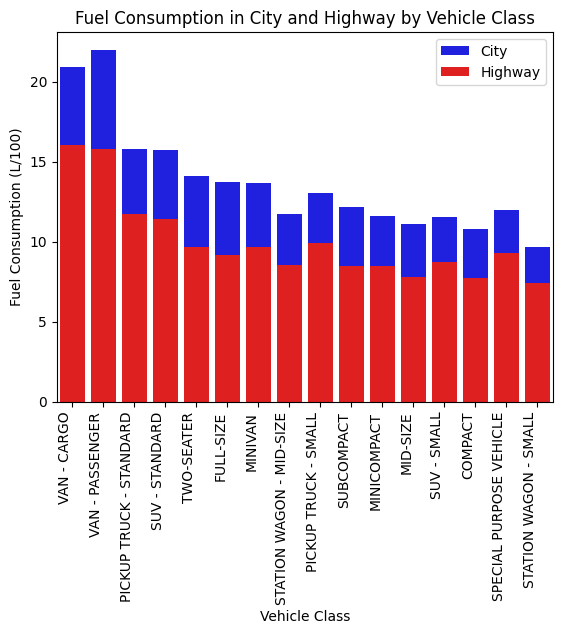

In [32]:
sns.barplot(data=data, x=data.index, y="Fuel_consumption_city(L/100)", color="b", label="City")
sns.barplot(data=data, x=data.index, y="Fuel_consumption_hwy(L/100)", color="r", label="Highway")

# Adding labels and title
plt.xlabel("Vehicle Class")
plt.ylabel("Fuel Consumption (L/100)")
plt.title("Fuel Consumption in City and Highway by Vehicle Class")
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=90, ha="right");
plt.show()
# the fuel consumption in highway is comparatively less than city and soo the carbon emission also greater in cities

creating a category of engine size

In [33]:
data=df.groupby('Engine_size(L)')['Fuel_consumption_comb(L/100)'].agg(Fuel_Consumption='mean')
bins=[1,2,3,4,5,6,7,8,9]
data
df['Engine_size_category'] = pd.cut(df['Engine_size(L)'], bins=bins, labels=range(1, 9))
mean_fuel_consumption_by_category = df.groupby('Engine_size_category')['Fuel_consumption_comb(L/100)'].agg(Fuel_consumption='mean')
mean_fuel_consumption_by_category
# so basically with the greater engine size , the fuel consumption also increases and soo the emission

,Fuel_consumption
Engine_size_category,
1,8.539284
2,10.285392
3,11.964254
4,14.112245
5,15.429061
6,15.285882
7,22.200000
8,16.360000


In [ ]:
df.sample(5)

In [ ]:
sns.set(style="ticks")
sns.pairplot(numerical_cols,diag_kind='kde')

encoding the fuel type

In [35]:
df.Fuel_type.unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [36]:
fuel_type_code={'Z':1, 'D':2, 'X':3, 'E':4, 'N':5}
df['fuel_type_code']=df.Fuel_type.map(fuel_type_code)

<Axes: >

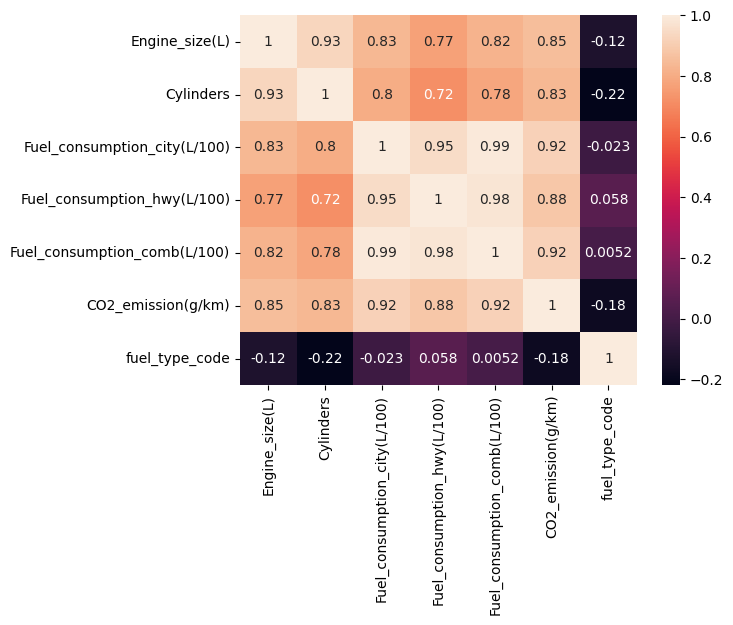

In [37]:
numerical_cols=df.select_dtypes(include=['int','float'])
sns.heatmap(numerical_cols.corr(),annot=True)

detecting the outliers

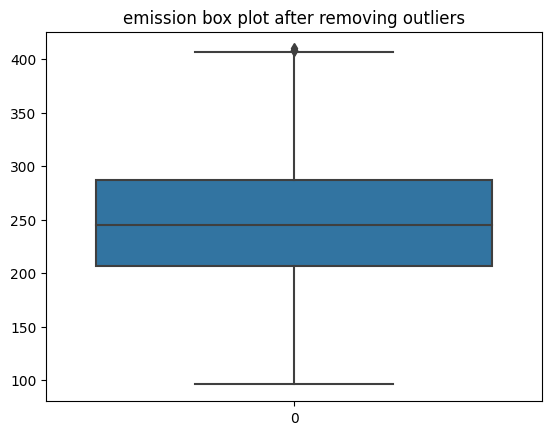

In [38]:
q1=df['CO2_emission(g/km)'].quantile(.25)
q3=df['CO2_emission(g/km)'].quantile(.75)
iqr=q3-q1
lower_bound=q1-iqr*1.5
upper_bound=q3+iqr*1.5
df=df [ (df['CO2_emission(g/km)']>=lower_bound) & (df['CO2_emission(g/km)']<=upper_bound) ]
sns.boxplot(df['CO2_emission(g/km)'])
plt.title('emission box plot after removing outliers');

### so based on above model we can say that, the carbon emission depends on engine-size, cylinders, and fuel consumption in cities 

#### so now we can create a model to predict the carbon emission 

so first we have to encode the vehicle_class , we will be using label encoding

In [39]:
label_encoding=preprocessing.LabelEncoder()
df['vehicle_class_code']=label_encoding.fit_transform(df['vehicle_class'])

In [43]:
label_encoding.classes_

array(['COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'MINIVAN',
       'PICKUP TRUCK - SMALL', 'PICKUP TRUCK - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE',
       'STATION WAGON - SMALL', 'SUBCOMPACT', 'SUV - SMALL',
       'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO', 'VAN - PASSENGER'],
      dtype=object)

In [47]:
label_encoding.transform(['SPECIAL PURPOSE VEHICLE'])[0]

7

In [49]:
feature_cols=df.select_dtypes(include=['int','float'])

In [50]:
feature_cols.columns

Index(['Engine_size(L)', 'Cylinders', 'Fuel_consumption_city(L/100)',
       'Fuel_consumption_hwy(L/100)', 'Fuel_consumption_comb(L/100)',
       'CO2_emission(g/km)', 'fuel_type_code', 'vehicle_class_code'],
      dtype='object')

In [51]:
x=feature_cols[['Engine_size(L)', 'Cylinders', 'Fuel_consumption_city(L/100)','vehicle_class_code']]
y=feature_cols['CO2_emission(g/km)']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.4)
model=LinearRegression()
model.fit(X_train,y_train)
predicted_emission=model.predict(X_test)

In [53]:
r2_score(predicted_emission,y_test)

0.8556408494005666

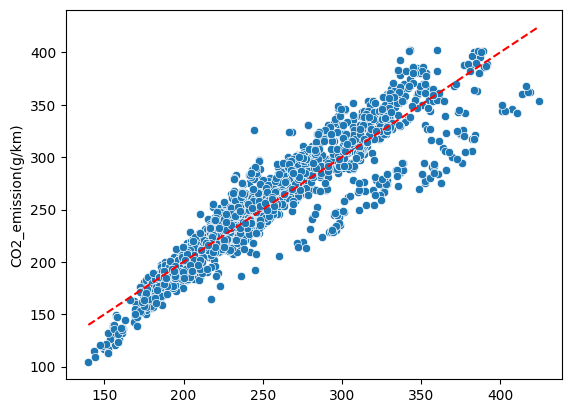

In [54]:
sns.scatterplot(x=predicted_emission,y=y_test)
plt.plot([min(predicted_emission), max(predicted_emission)], [min(predicted_emission), max(predicted_emission)], color='red', linestyle='--')

In [ ]:
joblib.dump(model,'Carbon_Emission_calculate.pkl')

In [61]:
X_test.tail()

,Engine_size(L),Cylinders,Fuel_consumption_city(L/100),vehicle_class_code
3905,2.0,4,10.3,11
3799,1.5,4,7.9,1
6302,1.6,4,7.6,2
1666,3.2,6,11.4,11
798,1.6,4,9.3,3


In [60]:
y_test

6431    174
851     200
2929    136
880     246
3461    250
       ... 
3905    216
3799    170
6302    164
1666    228
798     191
Name: CO2_emission(g/km), Length: 2484, dtype: int64